# Big Query :Google Analytice Time Series Experiment


*Written by -*[Samuel Nnitiwe Theophilus-LinkedIn](https://www.linkedin.com/in/samuelnnitiwetheophilus/) <br>
**Email:** ```nnitiwe@gmail.com``` <br>

<hr>

**Task Guidelines:** <br>
Implement a ML algorithm using Big Query ML which given a data set with a specific date range and set of parameters, can predict - 
1. The date range for your data set must have a maximum of  - 1 year of data.

2. The number of sales for a given day at the product level (or equivalent).

3. The number of sales for a given week at the product level (or equivalent).

4. The number of sales for a given month at the product level (or equivalent).

5. Present the results of your predictions vs the actual figures.

# Solution:
### - Install and import libraries

In [ ]:
#!pip install google-cloud-bigquery --quiet

from google.cloud import bigquery
import time
import pandas as pd
import matplotlib.pyplot as plt
import os

### - Actvate Custom Config

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

PROJECT_ID = "xxxx"
REGION = 'US'

Create Database ```adaptive_analytics``` :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Log into GCP Application - Big Query using access token:

In [ ]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/Colab Notebooks/nnit-bot-938a5ba05f05.json"

In [ ]:
!bq mk --location=$REGION --dataset $PROJECT_ID:adaptive_analytics

# Data Analysis & Insights

Size of Google Analytics Sample dataset:

In [ ]:
%%bigquery --project $PROJECT_ID

SELECT
  SUM(size_bytes) Bytes
FROM
  `bigquery-public-data.google_analytics_sample.__TABLES__`

,Bytes
0,5766802686


Total number of transactions generated per device browser Between Aug, 2016 & Aug, 2017:

In [ ]:
%%bigquery --project $PROJECT_ID

SELECT
  device.operatingSystem AS device,
  SUM(totals.transactions) AS transactions
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE
  _TABLE_SUFFIX BETWEEN '20160801'
  AND '20170731'
GROUP BY
  device
ORDER BY
  transactions DESC
        

,device,transactions
0,Macintosh,6677.000
1,Windows,2542.000
2,Chrome OS,1028.000
3,Linux,797.000
4,iOS,536.000
5,Android,489.000
6,Windows Phone,1.000
7,Nokia,nan
8,(not set),nan
9,Nintendo 3DS,nan


Average number of product pageviews for users who made a purchase between Aug, 2016 & Aug, 2017:

In [ ]:
%%bigquery --project $PROJECT_ID

SELECT
  product.productSKU,
  AVG(totals.pageviews) AS pageviews,
  totals.transactions AS transactions
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
  UNNEST(hits) AS hits,
  UNNEST(hits.product) AS product
WHERE
  (_TABLE_SUFFIX BETWEEN '20160801'
    AND '20170831')
GROUP BY
  product.productSKU, transactions

,productSKU,pageviews,transactions
0,GGOEGHPB003410,13.865,nan
1,GGOEGDHC074099,15.845,nan
2,GGOEGAAX0690,18.278,nan
3,9180833,18.209,nan
4,9180792,24.476,nan
...,...,...,...
7247,GGOEGAPB057512,42.000,2.000
7248,GGOEGAPB058616,18.000,1.000
7249,9181663,16.667,nan
7250,9182921,62.333,1.000


Bounce Rates between Aug, 2016 & Aug, 2017:

In [ ]:
%%bigquery --project $PROJECT_ID

SELECT
  sources,
  total_pageviews,
  bounces,
  ((bounces/total_pageviews)*100) AS bounce_rate,
  totalviews2
FROM (
  SELECT
    SUM(totals.bounces) AS bounces,
    COUNT(totals.pageviews) AS total_pageviews,
    trafficSource.source AS sources,
    COUNT(trafficSource.source) AS totalviews2
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_*`
  WHERE
    _TABLE_SUFFIX BETWEEN '20160801'
    AND '20170731'
  GROUP BY
    sources )
ORDER BY
  total_pageviews DESC,
  bounce_rate,
  bounces

,sources,total_pageviews,bounces,bounce_rate,totalviews2
0,(direct),369253,154275.000,41.780,369303
1,google,241255,116459.000,48.272,241280
2,youtube.com,212409,140148.000,65.980,212422
3,Partners,16357,8677.000,53.048,16359
4,analytics.google.com,16113,8422.000,52.268,16115
...,...,...,...,...,...
270,google.com.vn,1,1.000,100.000,1
271,meetup.com,1,1.000,100.000,1
272,google.com.sa,1,1.000,100.000,1
273,ps-dm.reddit.com,1,1.000,100.000,1


Total number of transactions generated per device browser between Aug, 2016 & Aug, 2017:

In [ ]:
%%bigquery --project $PROJECT_ID

SELECT
  device.operatingSystem AS device,
  SUM(totals.transactions) AS transactions
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE
  _TABLE_SUFFIX BETWEEN '20160801'
  AND '20170731'
GROUP BY
  device
ORDER BY
  transactions DESC

,device,transactions
0,Macintosh,6677.000
1,Windows,2542.000
2,Chrome OS,1028.000
3,Linux,797.000
4,iOS,536.000
5,Android,489.000
6,Windows Phone,1.000
7,Nokia,nan
8,Firefox OS,nan
9,OpenBSD,nan


Monthly Visits:

In [ ]:
%%bigquery --project $PROJECT_ID

SELECT
  CONCAT(SUBSTR(date,0,4),'-', SUBSTR(date,5,2)) Month,
  COUNT(*) Visits
FROM
  `bigquery-public-data.google_analytics_sample.*`
GROUP BY
  Month
ORDER BY
  Month

,Month,Visits
0,2016-08,74759
1,2016-09,71032
2,2016-10,97506
3,2016-11,113972
4,2016-12,79124
5,2017-01,64694
6,2017-02,62192
7,2017-03,69931
8,2017-04,67126
9,2017-05,65371


Visits from different Cities:

In [ ]:
%%bigquery --project $PROJECT_ID

SELECT
  City,
  COUNT(*) CountCountry
FROM (
  SELECT
    DISTINCT geoNetwork.city City,
    geoNetwork.country Country
  FROM
    `bigquery-public-data.google_analytics_sample.*` )
GROUP BY
  City
HAVING
  CountCountry > 1
ORDER BY
  CountCountry DESC

,City,CountCountry
0,not available in demo dataset,201
1,(not set),170
2,Mountain View,38
3,San Francisco,32
4,New York,28
...,...,...
113,Kitchener,2
114,Saint Petersburg,2
115,Kiev,2
116,Manila,2


Query to visualize the time series data

In [ ]:
%%bigquery --project $PROJECT_ID

SELECT
  PARSE_TIMESTAMP("%Y%m%d", date) AS parsed_date,
  SUM(totals.transactions) AS total_transactions, product.productSKU
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
  UNNEST(hits) AS hits,
  UNNEST(hits.product) AS product
GROUP BY
  date, product.productSKU

,parsed_date,total_transactions,productSKU
0,2017-05-17 00:00:00+00:00,5.000,GGOEGOCT019199
1,2017-05-17 00:00:00+00:00,1.000,GGOEGOAR013099
2,2017-05-17 00:00:00+00:00,8.000,GGOEGESQ016799
3,2017-05-17 00:00:00+00:00,7.000,GGOEGAAX0360
4,2017-05-17 00:00:00+00:00,nan,9182742
...,...,...,...
176122,2017-03-02 00:00:00+00:00,1.000,9183188
176123,2017-03-02 00:00:00+00:00,13.000,GGOEGHGR019499
176124,2017-03-02 00:00:00+00:00,nan,GGOEGOCD078199
176125,2017-03-02 00:00:00+00:00,nan,GGOEGAAJ032615


# Model Training

Model Training paramaeter:

In [ ]:
MODEL_PARAMS = {
    'TRAININGDATA_STARTDATE': '20160801',
    'TRAININGDATA_ENDDATE': '20161231',
}
MODEL_PARAMS

{'TRAININGDATA_ENDDATE': '20161231', 'TRAININGDATA_STARTDATE': '20160801'}

In [ ]:
%%bigquery --params $MODEL_PARAMS  --project $PROJECT_ID 

CREATE OR REPLACE TABLE adaptive_analytics.ml_adaptative_data AS (
SELECT
  PARSE_TIMESTAMP("%Y%m%d", date) AS parsed_date,
  IFNULL(SUM(totals.transactions),0) AS total_transactions, 
  product.productSKU AS product_name
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
  UNNEST(hits) AS hits,
  UNNEST(hits.product) AS product
GROUP BY
  date, product.productSKU
    HAVING 
        date BETWEEN @TRAININGDATA_STARTDATE AND @TRAININGDATA_ENDDATE
    );

#Show Table
SELECT 
    parsed_date,
    product_name,
    total_transactions
FROM 
    adaptive_analytics.ml_adaptative_data 
ORDER BY parsed_date, product_name DESC
LIMIT 10

,parsed_date,product_name,total_transactions
0,2016-08-01 00:00:00+00:00,GGOEYHPA003510,19
1,2016-08-01 00:00:00+00:00,GGOEYDHJ056099,41
2,2016-08-01 00:00:00+00:00,GGOEYDHJ019399,54
3,2016-08-01 00:00:00+00:00,GGOEYAEB031414,0
4,2016-08-01 00:00:00+00:00,GGOEYAEB028414,17
5,2016-08-01 00:00:00+00:00,GGOEYAEB028413,5
6,2016-08-01 00:00:00+00:00,GGOEYAAQ031714,3
7,2016-08-01 00:00:00+00:00,GGOEYAAJ032516,17
8,2016-08-01 00:00:00+00:00,GGOEYAAJ032514,17
9,2016-08-01 00:00:00+00:00,GGOEYAAB034615,0


Plot Graph

In [ ]:
%%bigquery dfhistorical --project $PROJECT_ID 

SELECT 
    * 
FROM 
    adaptive_analytics.ml_adaptative_data

In [ ]:
def plot_historical_and_forecast(input_timeseries, 
                                 timestamp_col_name, 
                                 data_col_name, 
                                 forecast_output=None, 
                                 actual=None, 
                                 title=None,
                                 plotstartdate=None):

    if plotstartdate:
        input_timeseries = input_timeseries[input_timeseries[timestamp_col_name] >= pd.to_datetime(plotstartdate)]
    input_timeseries = input_timeseries.sort_values(timestamp_col_name)    
    
    # Plot the input historical data
    plt.figure(figsize=(20,6))
    plt.plot(input_timeseries[timestamp_col_name], input_timeseries[data_col_name], label = 'Historical')
    plt.xlabel(timestamp_col_name)
    plt.ylabel(data_col_name)

    if forecast_output is not None:
        forecast_output = forecast_output.sort_values('forecast_timestamp')
        forecast_output['forecast_timestamp'] = pd.to_datetime(forecast_output['forecast_timestamp'])
        x_data = forecast_output['forecast_timestamp']
        y_data = forecast_output['forecast_value']
        confidence_level = forecast_output['confidence_level'].iloc[0] * 100
        low_CI = forecast_output['confidence_interval_lower_bound']
        upper_CI = forecast_output['confidence_interval_upper_bound']
        # Plot the forecast data
        plt.plot(x_data, y_data, alpha = 1, label = 'Forecast', linestyle='--')
        # Shade the confidence interval
        plt.fill_between(x_data, low_CI, upper_CI, color = '#539caf', alpha = 0.4, 
                         label = f'{confidence_level} confidence interval')

    # Plot actual data
    if actual is not None:
        actual = actual.sort_values(timestamp_col_name)
        plt.plot(actual[timestamp_col_name], actual[data_col_name], label = 'Actual', linestyle='--')   

    # Display title, legend
    plt.title(f'{title}', fontsize= 16)
    plt.legend(loc = 'upper center', prop={'size': 16})

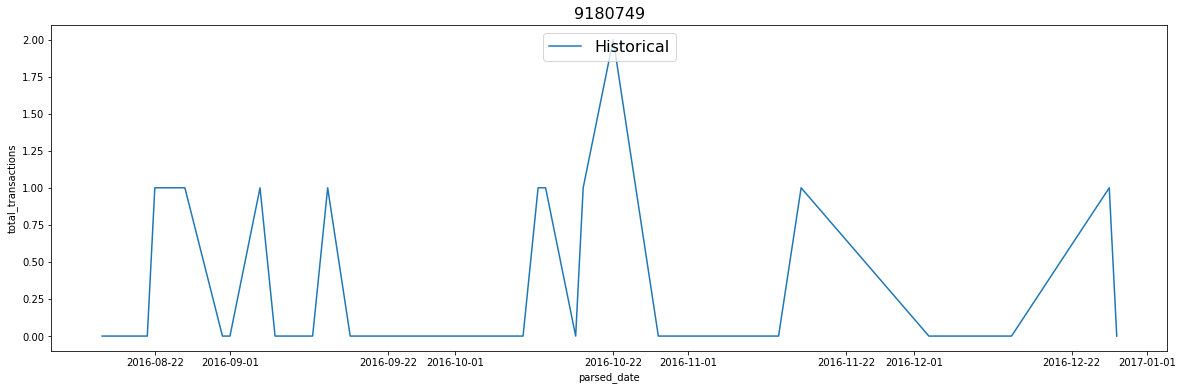

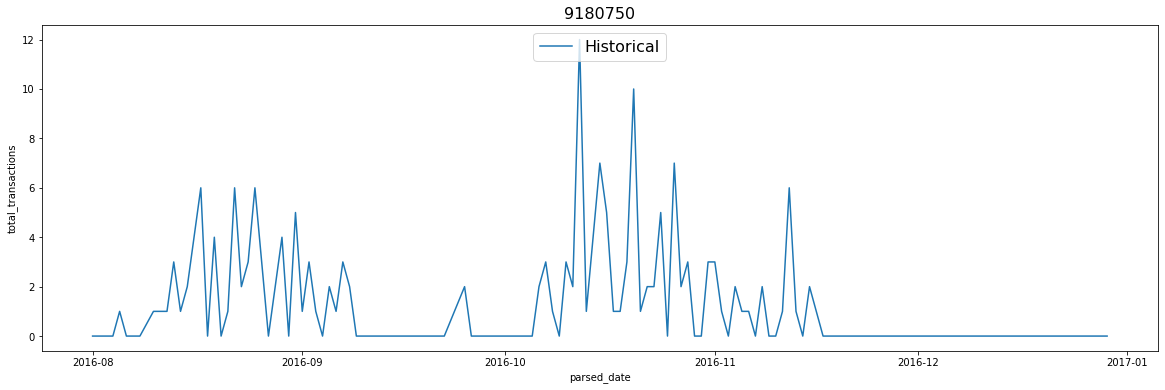

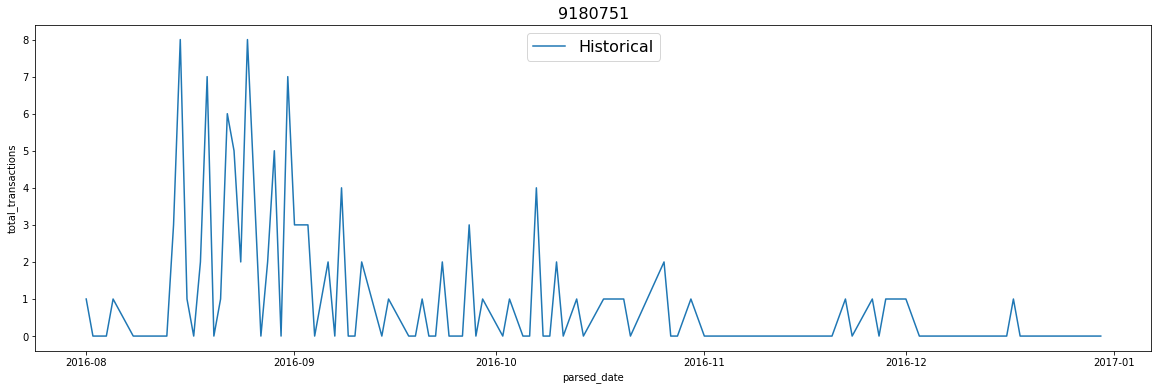

In [ ]:
itemslist = list(dfhistorical.product_name.unique())
count= 0
for item in itemslist:
    if count>1 and count<5:
      datah = dfhistorical[dfhistorical.product_name==item]
      plot_historical_and_forecast(input_timeseries = datah, 
                                  timestamp_col_name = "parsed_date", 
                                  data_col_name = "total_transactions", 
                                  forecast_output = None, 
                                  actual = None,
                                  title = item)
    count+=1

Train Model:

In [ ]:
%%bigquery --project $PROJECT_ID 

CREATE OR REPLACE MODEL adaptive_analytics.arima_model

OPTIONS(
  MODEL_TYPE='ARIMA_PLUS',
  TIME_SERIES_TIMESTAMP_COL='parsed_date', 
  TIME_SERIES_DATA_COL='total_transactions',
  TIME_SERIES_ID_COL='product_name',
  auto_arima = TRUE,
  data_frequency = 'AUTO_FREQUENCY',
  decompose_time_series = TRUE,
  HOLIDAY_REGION='GLOBAL'
) AS

SELECT 
    parsed_date,
    product_name,
    total_transactions
FROM
  adaptive_analytics.ml_adaptative_data

""


In [ ]:
%%bigquery --project $PROJECT_ID 

SELECT
 *
FROM
 ML.ARIMA_COEFFICIENTS(MODEL adaptive_analytics.arima_model)

,product_name,ar_coefficients,ma_coefficients,intercept_or_drift
0,10 13058,[],[],0.000
1,10 13097,[],[],0.000
2,10 14133,[],[],0.000
3,10 15103,[],[],0.000
4,10 31023,[],[],0.000
...,...,...,...,...
1441,GGOEYOCR077399,[],[0.31559433980311435],4.228
1442,GGOEYOCR077799,[],"[0.250460950197091, -0.15261896495834293, -0.2...",5.516
1443,GGOEYOCR078099,[],[0.2030786510526],4.654
1444,GGOEYOLR018699,[],"[-0.9728297519919833, 0.15945987456217292]",0.000


Evaluate Model

In [ ]:
%%bigquery --project $PROJECT_ID 

SELECT
  *
FROM
  ML.EVALUATE(MODEL adaptive_analytics.arima_model)

,product_name,non_seasonal_p,non_seasonal_d,non_seasonal_q,has_drift,log_likelihood,AIC,variance,seasonal_periods,has_holiday_effect,has_spikes_and_dips,has_step_changes
0,10 13058,0,0,0,False,inf,-inf,0.000,[NO_SEASONALITY],False,False,False
1,10 13097,0,0,0,False,inf,-inf,0.000,[NO_SEASONALITY],False,False,False
2,10 14133,0,0,0,False,inf,-inf,0.000,[NO_SEASONALITY],False,False,False
3,10 15103,0,0,0,False,inf,-inf,0.000,[NO_SEASONALITY],False,False,False
4,10 31023,0,0,0,False,inf,-inf,0.000,[NO_SEASONALITY],False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1441,GGOEYOCR077399,0,0,1,False,-244.025,494.049,17.046,[NO_SEASONALITY],False,True,False
1442,GGOEYOCR077799,0,0,4,False,-283.550,579.101,33.958,[NO_SEASONALITY],False,True,False
1443,GGOEYOCR078099,0,0,1,False,-212.258,430.515,30.095,[NO_SEASONALITY],False,True,False
1444,GGOEYOLR018699,0,1,2,False,-620.665,1247.331,303.164,[WEEKLY],False,True,False


**Horizon** is the number of time points to forecast. This means in make daily, weekly and monthly forecasts, ```Horizon Value```  will be:

1. One Day == ```Horizon=1```
2. One Week == ```Horizon=7```
3. One Month== ```Horizon =30```

### Forecasting
Forecast Transactions for Jan,2017:




In [ ]:
%%bigquery dfforecast --project $PROJECT_ID 
SELECT
 *
FROM
 ML.FORECAST(MODEL adaptive_analytics.arima_model,
             STRUCT(30 AS horizon, 0.8 AS confidence_level))

In [ ]:
dfforecast.head()

,product_name,forecast_timestamp,forecast_value,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,confidence_interval_lower_bound,confidence_interval_upper_bound
0,10 13058,2016-11-28 00:00:00+00:00,0.000,0.000,0.800,0.000,0.000,0.000,0.000
1,10 13058,2017-01-10 00:00:00+00:00,0.000,0.000,0.800,0.000,0.000,0.000,0.000
2,10 13058,2017-02-22 00:00:00+00:00,0.000,0.000,0.800,0.000,0.000,0.000,0.000
3,10 13058,2017-04-06 00:00:00+00:00,0.000,0.000,0.800,0.000,0.000,0.000,0.000
4,10 13058,2017-05-19 00:00:00+00:00,0.000,0.000,0.800,0.000,0.000,0.000,0.000


In [ ]:
%%bigquery --project $PROJECT_ID 

SELECT
 *
FROM
 ML.EXPLAIN_FORECAST(MODEL adaptive_analytics.arima_model,
                     STRUCT(30 AS horizon, 0.8 AS confidence_level))

,product_name,time_series_timestamp,time_series_type,time_series_data,time_series_adjusted_data,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,trend,seasonal_period_yearly,seasonal_period_quarterly,seasonal_period_monthly,seasonal_period_weekly,seasonal_period_daily,holiday_effect,spikes_and_dips,step_changes
0,10 13058,2016-07-22 00:00:00+00:00,history,0.000,0.000,0.000,nan,nan,nan,0.000,None,None,None,nan,None,None,nan,nan
1,10 13058,2016-09-03 00:00:00+00:00,history,0.000,0.000,0.000,nan,nan,nan,0.000,None,None,None,nan,None,None,nan,nan
2,10 13058,2016-10-16 00:00:00+00:00,history,0.000,0.000,0.000,nan,nan,nan,0.000,None,None,None,nan,None,None,nan,nan
3,10 13058,2016-11-28 00:00:00+00:00,forecast,0.000,0.000,0.000,0.800,0.000,0.000,0.000,None,None,None,nan,None,None,nan,nan
4,10 13058,2017-01-10 00:00:00+00:00,forecast,0.000,0.000,0.000,0.800,0.000,0.000,0.000,None,None,None,nan,None,None,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135721,GGOEYOLR080599,2017-01-26 00:00:00+00:00,forecast,1.467,1.467,6.533,0.800,-6.911,9.844,5.680,None,None,None,-4.213,None,None,nan,nan
135722,GGOEYOLR080599,2017-01-27 00:00:00+00:00,forecast,6.921,6.921,6.533,0.800,-1.457,15.298,5.680,None,None,None,1.241,None,None,nan,nan
135723,GGOEYOLR080599,2017-01-28 00:00:00+00:00,forecast,3.575,3.575,6.533,0.800,-4.803,11.952,5.680,None,None,None,-2.105,None,None,nan,nan
135724,GGOEYOLR080599,2017-01-29 00:00:00+00:00,forecast,0.635,0.635,6.533,0.800,-7.742,9.012,5.680,None,None,None,-5.045,None,None,nan,nan


Get Actual Data

In [ ]:
MODEL_TEST_PARAMS = {
    'TESTDATA_STARTDATE': '20170101',
    'TESTDATA_ENDDATE': '20170831',
}
MODEL_TEST_PARAMS

{'TESTDATA_ENDDATE': '20170831', 'TESTDATA_STARTDATE': '20170101'}

Actual Transaction values for 2017:

In [ ]:
%%bigquery dfactual --params $MODEL_TEST_PARAMS --project $PROJECT_ID 

SELECT
  PARSE_TIMESTAMP("%Y%m%d", date) AS parsed_date,
  IFNULL(SUM(totals.transactions),0) AS total_transactions, 
  product.productSKU AS product_name
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
  UNNEST(hits) AS hits,
  UNNEST(hits.product) AS product
GROUP BY
    date, product.productSKU
HAVING 
    date BETWEEN @TESTDATA_STARTDATE
            AND @TESTDATA_ENDDATE
ORDER BY
    date;

In [ ]:
dfactual.head()

,parsed_date,total_transactions,product_name
0,2017-01-01 00:00:00+00:00,5,GGOEGKAA019299
1,2017-01-01 00:00:00+00:00,2,GGOEGETR014599
2,2017-01-01 00:00:00+00:00,6,GGOEGEVJ023999
3,2017-01-01 00:00:00+00:00,15,GGOEGAAX0317
4,2017-01-01 00:00:00+00:00,4,GGOEGAAX0680


# Export for Visualiation in Data Studio

In [ ]:
%%bigquery  --project $PROJECT_ID 

CREATE OR REPLACE VIEW adaptive_analytics.outputdata_datastudio AS (
SELECT
 history_timestamp AS timestamp,
 history_value,
 NULL AS forecast_value,
 NULL AS prediction_interval_lower_bound,
 NULL AS prediction_interval_upper_bound
FROM
 (
   SELECT
     PARSE_TIMESTAMP("%Y%m%d", date) AS history_timestamp,
     IFNULL(SUM(totals.transactions),0) AS history_value,
     product.productSKU AS product_name 
   FROM
     `bigquery-public-data.google_analytics_sample.ga_sessions_*`,
   UNNEST(hits) AS hits,
   UNNEST(hits.product) AS product
  
   GROUP BY date, product.productSKU
   ORDER BY date ASC
 )
UNION ALL
SELECT
 forecast_timestamp AS timestamp,
 NULL AS history_value,
 forecast_value,
 prediction_interval_lower_bound,
 prediction_interval_upper_bound
FROM
 ML.FORECAST(MODEL adaptive_analytics.arima_model,
             STRUCT(30 AS horizon, 0.8 AS confidence_level))
)

""


In [ ]:
%%bigquery dfforecast --project $PROJECT_ID 

CREATE OR REPLACE TABLE adaptive_analytics.ml_adaptative_explained_forcast_data AS (
SELECT
 *
FROM
 ML.FORECAST(MODEL adaptive_analytics.arima_model,
             STRUCT(30 AS horizon, 0.8 AS confidence_level))
)